## Median Days on Market in New Jersey (MEDDAYONMARNJ)

### Dataset Overview
This dataset captures the **median number of days properties stay on the market** in New Jersey. It provides valuable insights into real estate market activity, reflecting trends in buyer demand and market conditions over time.

### Methodology
The data underwent the following processing steps:
1. **Dataset Inspection**: 
   - Loaded the dataset and checked for missing values and column inconsistencies.
   - Confirmed the presence of a `DATE` column for time-series analysis.
2. **Data Cleaning**:
   - Stripped leading and trailing spaces from column names to standardize them.
   - Converted the `DATE` column to datetime format to ensure proper indexing and plotting.
   - Interpolated missing values in the `MEDDAYONMARNJ` column to maintain continuity in the trend.
3. **Visualization**:
   - Plotted the data to visualize the trend of median days on the market over time.

### Source
- **Federal Reserve Economic Data (FRED)**: [Median Days on Market for New Jersey (MEDDAYONMARNJ)](https://fred.stlouisfed.org/series/MEDDAYONMARNJ)

### Key Observations
- The graph reveals **periodic fluctuations** in market activity:
  - **Higher values** indicate a slower market, suggesting less demand or more supply.
  - **Lower values** indicate a faster market, reflecting higher buyer demand or limited inventory.
- Seasonal trends and economic shifts may contribute to observable peaks and troughs in the data.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           100 non-null    object 
 1   MEDDAYONMARNJ  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

Null Values in Each Column:
DATE             0
MEDDAYONMARNJ    0
dtype: int64

Original Column Names:
Index(['DATE', 'MEDDAYONMARNJ'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'MEDDAYONMARNJ'], dtype='object')


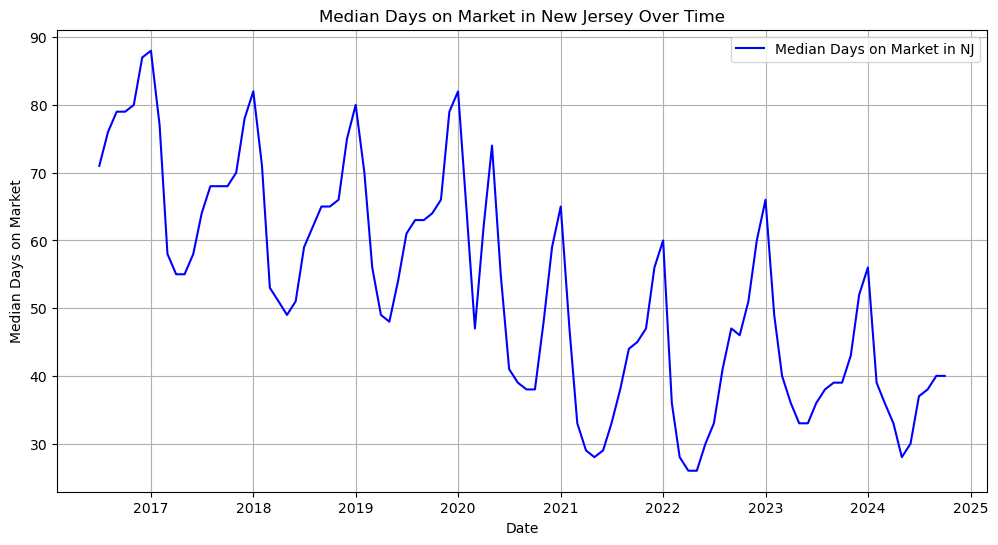

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/MEDDAYONMARNJ.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df.columns)

# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()
print("\nCleaned Column Names:")
print(df.columns)

# Convert 'DATE' column to datetime format
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    # Set 'DATE' as the index
    df.set_index('DATE', inplace=True)
else:
    print("Error: 'DATE' column is missing from the dataset.")
    raise KeyError("The dataset must contain a 'DATE' column for time-series plotting.")

# Ensure there are no NaN values in the target column
if df['MEDDAYONMARNJ'].isna().any():
    print("\nWarning: Missing values detected in 'MEDDAYONMARNJ'. These will be interpolated.")
    df['MEDDAYONMARNJ'].interpolate(method='time', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MEDDAYONMARNJ'], label='Median Days on Market in NJ', color='blue')
plt.title('Median Days on Market in New Jersey Over Time')
plt.xlabel('Date')
plt.ylabel('Median Days on Market')
plt.legend()
plt.grid()
plt.show()


## Median Listing Price Month-Over-Month in Hudson County, NJ (MEDLISPRIMM34017)

### Description
This dataset tracks the median listing price trends for properties in Hudson County, NJ, on a month-over-month basis. It provides insights into pricing patterns and market demand within the county.

### Steps
1. Load the dataset and inspect its structure.
2. Remove leading/trailing spaces from column names to standardize them.
3. Check for null values and ensure the `DATE` column is converted to datetime format.
4. Set the `DATE` column as the index for time-series analysis.
5. Plot the median listing price trend over time to visualize monthly changes.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/MEDLISPRIMM34017)

### Observations
- This graph illustrates the month-over-month fluctuations in median listing prices in Hudson County, NJ.
- Periods of increase suggest rising demand, while dips may indicate market corrections or seasonal trends.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              88 non-null     object 
 1   MEDLISPRIMM34017  88 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None

Null Values in Each Column:
DATE                0
MEDLISPRIMM34017    0
dtype: int64

Original Column Names:
Index(['DATE', 'MEDLISPRIMM34017'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'MEDLISPRIMM34017'], dtype='object')


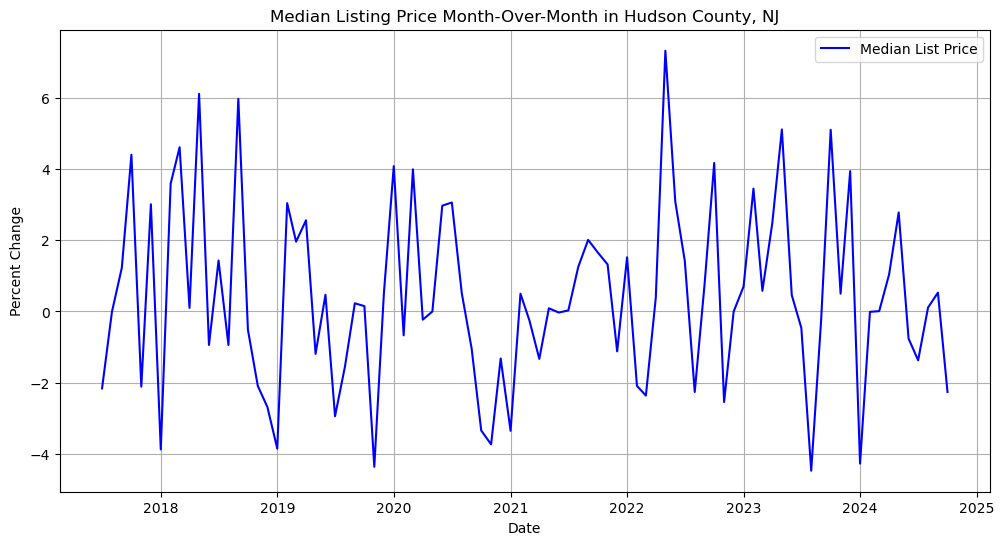

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df2 = pd.read_csv('../data/MEDLISPRIMM34017.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df2.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df2.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df2.columns)

# Remove leading/trailing spaces from column names
df2.columns = df2.columns.str.strip()
print("\nCleaned Column Names:")
print(df2.columns)

# Check for 'DATE' column existence and ensure consistency
if 'DATE' in df2.columns:
    df2['DATE'] = pd.to_datetime(df2['DATE'], errors='coerce')  # Convert to datetime
else:
    raise ValueError("The dataset does not have a 'DATE' column for time-series analysis.")

# Set DATE as the index for time-series plotting
df2.set_index('DATE', inplace=True)

# Drop any rows with NaT in the index
df2 = df2[df2.index.notna()]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['MEDLISPRIMM34017'], label='Median List Price', color='blue')
plt.title('Median Listing Price Month-Over-Month in Hudson County, NJ')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.legend()
plt.grid()
plt.show()


## Median Listing Price Per Square Foot in New Jersey (MEDLISPRIPERSQUFEENJ)

### Description
This dataset provides the median listing price per square foot for properties in New Jersey over time. It enables detailed analysis of property value trends based on the size of properties.

### Steps
1. Loaded the dataset and inspected its structure.
2. Cleaned column names to remove leading/trailing spaces for consistency.
3. Ensured the `DATE` column was present and formatted it as datetime. Missing or incorrect dates were handled using `errors='coerce'`.
4. Set the `DATE` column as the index to facilitate time-series analysis.
5. Visualized the trend in median listing prices per square foot over time using a line plot.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/MEDLISPRIPERSQUFEENJ)

### Observations
- The graph highlights the evolution of property values per square foot in New Jersey.
- Consistent increases indicate growing demand, market inflation, or other economic factors influencing the housing market.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  100 non-null    object 
 1   MEDLISPRIPERSQUFEENJ  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

Null Values in Each Column:
DATE                    0
MEDLISPRIPERSQUFEENJ    0
dtype: int64

Original Column Names:
Index(['DATE', 'MEDLISPRIPERSQUFEENJ'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'MEDLISPRIPERSQUFEENJ'], dtype='object')

Dataset Index After Setting DATE:
DatetimeIndex(['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', 

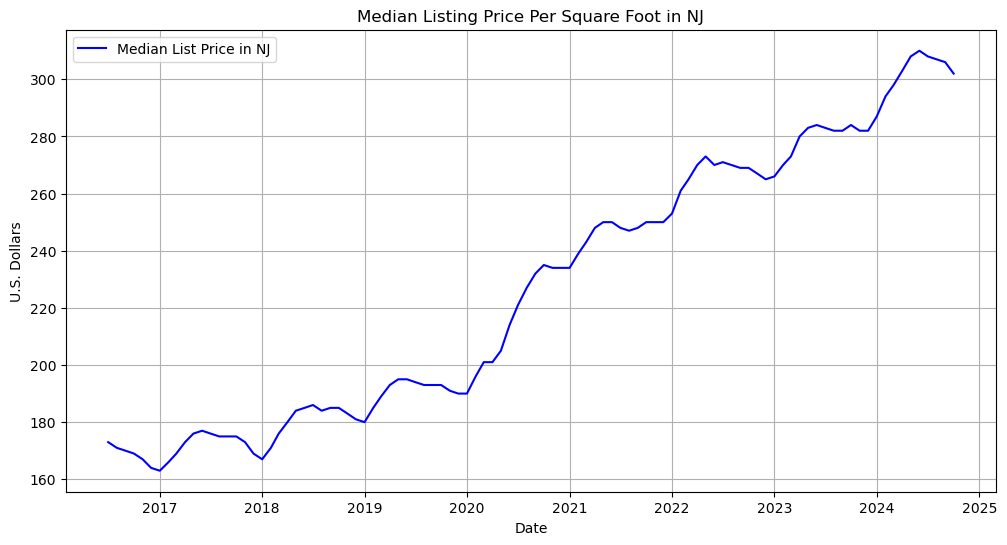

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df3 = pd.read_csv('../data/MEDLISPRIPERSQUFEENJ.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df3.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df3.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df3.columns)

# Remove leading/trailing spaces from column names
df3.columns = df3.columns.str.strip()
print("\nCleaned Column Names:")
print(df3.columns)

# Ensure DATE column exists and is formatted consistently
if 'DATE' in df3.columns:
    df3['DATE'] = pd.to_datetime(df3['DATE'], errors='coerce')
else:
    print("DATE column is missing in the dataset.")

# Set DATE as index for time-series plotting
df3.set_index('DATE', inplace=True)

# Verify the index
print("\nDataset Index After Setting DATE:")
print(df3.index)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3['MEDLISPRIPERSQUFEENJ'], label='Median List Price in NJ', color='blue')
plt.title('Median Listing Price Per Square Foot in NJ')
plt.xlabel('Date')
plt.ylabel('U.S. Dollars')
plt.legend()
plt.grid()
plt.show()


## Median Listing Price Per Square Foot Month-Over-Month in Monmouth County, NJ (MEDLISPRIPERSQUFEEMM34025)

### Description
This dataset provides the median listing price per square foot for properties in Monmouth County, NJ, on a month-over-month basis. It helps analyze localized property value trends in a key county within New Jersey.

### Steps
1. Loaded the dataset and inspected its structure.
2. Cleaned column names to remove leading/trailing spaces for consistent handling.
3. Ensured the `DATE` column was present, formatted it as datetime, and set it as the index for time-series analysis.
4. Visualized the trend in month-over-month median listing prices per square foot using a line plot.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/MEDLISPRIPERSQUFEEMM34025)

### Observations
- The graph shows trends in property values per square foot in Monmouth County, NJ.
- Periods of rapid growth or decline indicate significant market activity, reflecting changes in supply, demand, or broader economic factors.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       88 non-null     object 
 1   MEDLISPRIPERSQUFEEMM34025  88 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None

Null Values in Each Column:
DATE                         0
MEDLISPRIPERSQUFEEMM34025    0
dtype: int64

Original Column Names:
Index(['DATE', 'MEDLISPRIPERSQUFEEMM34025'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'MEDLISPRIPERSQUFEEMM34025'], dtype='object')

Dataset Index After Setting DATE:
DatetimeIndex(['2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
    

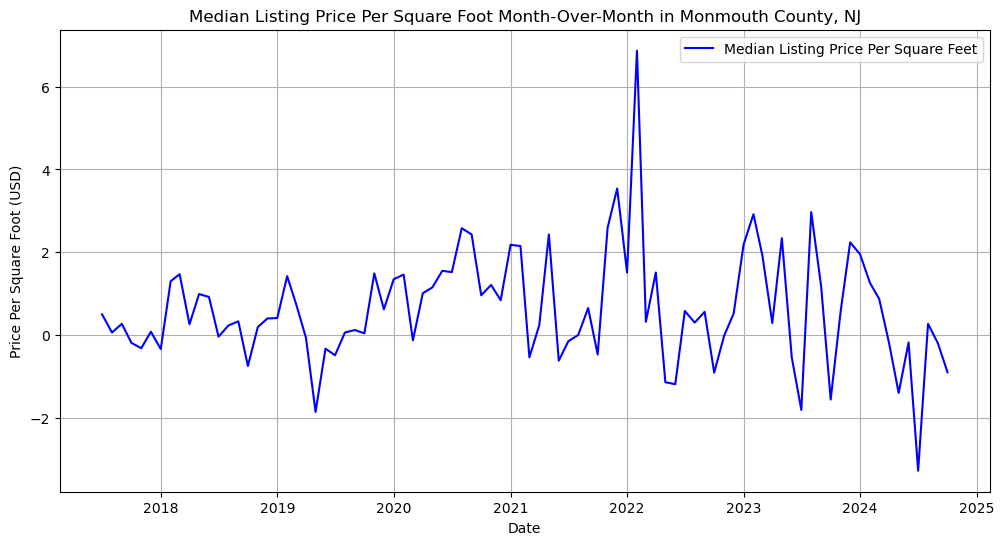

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df4 = pd.read_csv('../data/MEDLISPRIPERSQUFEEMM34025.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df4.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df4.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df4.columns)

# Remove leading/trailing spaces from column names
df4.columns = df4.columns.str.strip()
print("\nCleaned Column Names:")
print(df4.columns)

# Ensure DATE column exists and is formatted correctly
if 'DATE' in df4.columns:
    df4['DATE'] = pd.to_datetime(df4['DATE'], errors='coerce')
else:
    print("DATE column is missing in the dataset.")

# Set DATE as index for time-series plotting
df4.set_index('DATE', inplace=True)

# Verify the index
print("\nDataset Index After Setting DATE:")
print(df4.index)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df4.index, df4['MEDLISPRIPERSQUFEEMM34025'], label='Median Listing Price Per Square Feet', color='blue')
plt.title('Median Listing Price Per Square Foot Month-Over-Month in Monmouth County, NJ')
plt.xlabel('Date')
plt.ylabel('Price Per Square Foot (USD)')
plt.legend()
plt.grid()
plt.show()


## Median Listing Price Per Square Foot Month-Over-Month in Cape May County, NJ (MEDLISPRIMM34009)

### Description
This dataset provides the month-over-month trends in the median listing price per square foot for properties in Cape May County, NJ. It focuses on a key area in the southern part of New Jersey, offering insights into localized real estate pricing dynamics.

### Steps
1. Loaded the dataset and checked for structural consistency.
2. Cleaned column names to remove leading/trailing spaces for uniformity.
3. Ensured the `DATE` column was formatted as datetime and set it as the index for time-series analysis.
4. Visualized the median listing price per square foot trends using a line plot.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/MEDLISPRIMM34009)

### Observations
- The graph highlights pricing trends in Cape May County over time.
- Peaks and troughs may align with seasonal market demand or other economic factors influencing the area.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              88 non-null     object 
 1   MEDLISPRIMM34009  88 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None

Null Values in Each Column:
DATE                0
MEDLISPRIMM34009    0
dtype: int64

Original Column Names:
Index(['DATE', 'MEDLISPRIMM34009'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'MEDLISPRIMM34009'], dtype='object')

Dataset Index After Setting DATE:
DatetimeIndex(['2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
     

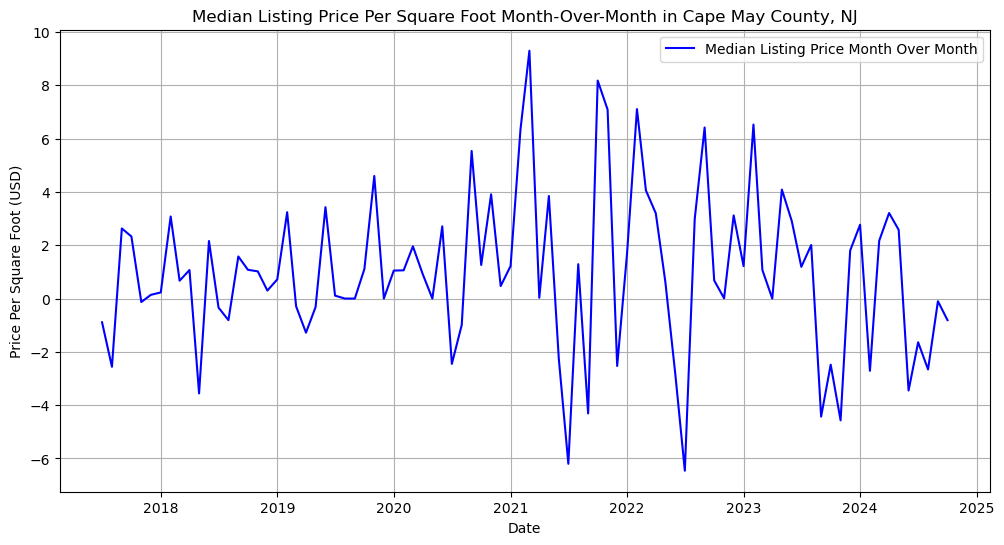

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df5 = pd.read_csv('../data/CapeMayMedList.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df5.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df5.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df5.columns)

# Remove leading/trailing spaces from column names
df5.columns = df5.columns.str.strip()
print("\nCleaned Column Names:")
print(df5.columns)

# Ensure DATE column exists and is formatted correctly
if 'DATE' in df5.columns:
    df5['DATE'] = pd.to_datetime(df5['DATE'], errors='coerce')
else:
    print("DATE column is missing in the dataset.")

# Set DATE as index for time-series plotting
df5.set_index('DATE', inplace=True)

# Verify the index
print("\nDataset Index After Setting DATE:")
print(df5.index)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df5.index, df5['MEDLISPRIMM34009'], label='Median Listing Price Month Over Month', color='blue')
plt.title('Median Listing Price Per Square Foot Month-Over-Month in Cape May County, NJ')
plt.xlabel('Date')
plt.ylabel('Price Per Square Foot (USD)')
plt.legend()
plt.grid()
plt.show()


## Median Listing Price in Middlesex County, NJ (MEDLISPRI34023)

### Description
This dataset provides trends in the median listing price for properties in Middlesex County, NJ, over time. Middlesex County, as one of New Jersey's most populous areas, offers valuable insights into broader real estate trends.

### Steps
1. Loaded the dataset and checked its structure for consistency.
2. Cleaned column names to remove leading/trailing spaces for uniformity.
3. Ensured the `DATE` column was formatted as datetime and set it as the index for time-series analysis.
4. Visualized the median listing price trends using a line plot.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/MEDLISPRI34023)

### Observations
- The graph reveals how property listing prices in Middlesex County have evolved over time.
- Periods of steady increases may reflect heightened demand and property value appreciation in the region.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            100 non-null    object 
 1   MEDLISPRI34023  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

Null Values in Each Column:
DATE              0
MEDLISPRI34023    0
dtype: int64

Original Column Names:
Index(['DATE', 'MEDLISPRI34023'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'MEDLISPRI34023'], dtype='object')

Dataset Index After Setting DATE:
DatetimeIndex(['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018

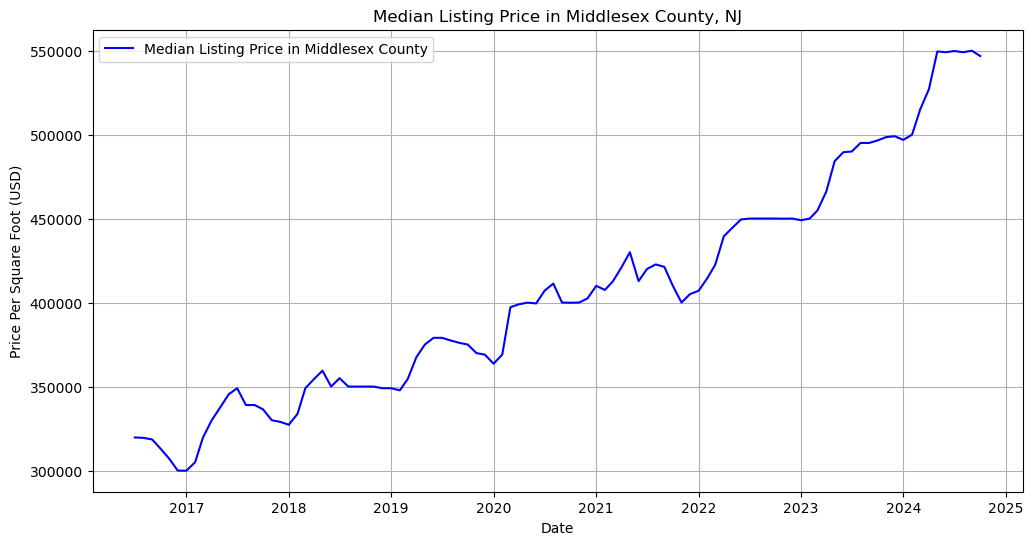

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df6 = pd.read_csv('../data/MiddleSexCountyMed.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df6.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df6.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df6.columns)

# Remove leading/trailing spaces from column names
df6.columns = df6.columns.str.strip()
print("\nCleaned Column Names:")
print(df6.columns)

# Ensure DATE column exists and is formatted correctly
if 'DATE' in df6.columns:
    df6['DATE'] = pd.to_datetime(df6['DATE'], errors='coerce')
else:
    print("DATE column is missing in the dataset.")

# Set DATE as index for time-series plotting
df6.set_index('DATE', inplace=True)

# Verify the index
print("\nDataset Index After Setting DATE:")
print(df6.index)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df6.index, df6['MEDLISPRI34023'], label='Median Listing Price in Middlesex County', color='blue')
plt.title('Median Listing Price in Middlesex County, NJ')
plt.xlabel('Date')
plt.ylabel('Price Per Square Foot (USD)')
plt.legend()
plt.grid()
plt.show()


## Median Listing Price in Bergen County, NJ (MEDLISPRI34003)

### Description
This dataset provides the median listing prices for properties in Bergen County, NJ, over time. Bergen County, being a key market in northern New Jersey, offers significant insights into regional real estate trends.

### Steps
1. Loaded the dataset and inspected its structure for consistency.
2. Cleaned column names to remove any leading/trailing spaces.
3. Ensured the `DATE` column was formatted as datetime and set it as the index for time-series analysis.
4. Visualized the trends in median listing prices using a line plot.

### Observations
- The graph highlights fluctuations in listing prices over time, potentially reflecting market demand and supply dynamics.
- Periods of rapid price increases may indicate heightened competition in the market.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/MEDLISPRI34003)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            100 non-null    object 
 1   MEDLISPRI34003  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

Null Values in Each Column:
DATE              0
MEDLISPRI34003    0
dtype: int64

Original Column Names:
Index(['DATE', 'MEDLISPRI34003'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'MEDLISPRI34003'], dtype='object')

Dataset Index After Setting DATE:
DatetimeIndex(['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018

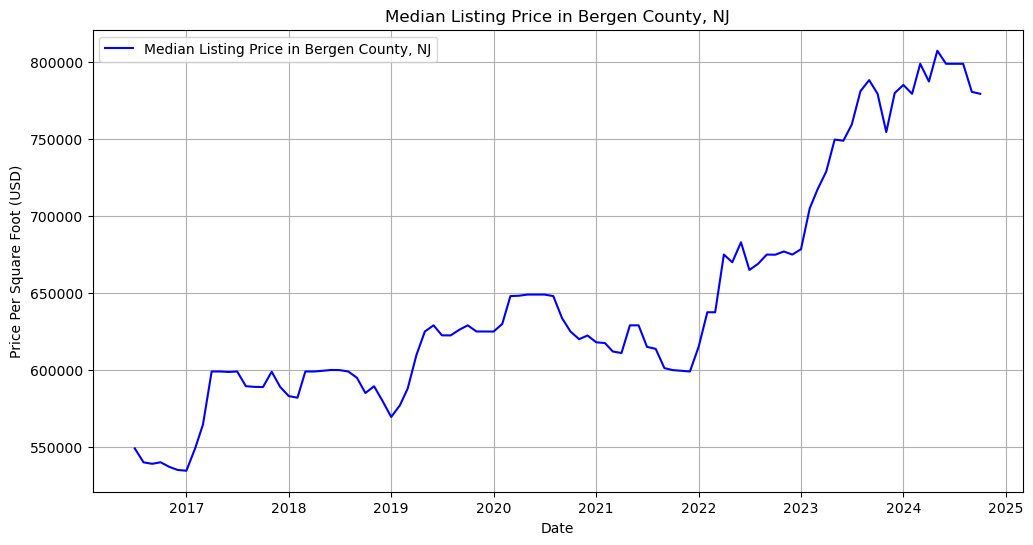

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df7 = pd.read_csv('../data/BergenCountyData.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df7.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df7.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df7.columns)

# Remove leading/trailing spaces from column names
df7.columns = df7.columns.str.strip()
print("\nCleaned Column Names:")
print(df7.columns)

# Ensure DATE column exists and is formatted correctly
if 'DATE' in df7.columns:
    df7['DATE'] = pd.to_datetime(df7['DATE'], errors='coerce')
else:
    print("DATE column is missing in the dataset.")

# Set DATE as index for time-series plotting
df7.set_index('DATE', inplace=True)

# Verify the index
print("\nDataset Index After Setting DATE:")
print(df7.index)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df7.index, df7['MEDLISPRI34003'], label='Median Listing Price in Bergen County, NJ', color='blue')
plt.title('Median Listing Price in Bergen County, NJ')
plt.xlabel('Date')
plt.ylabel('Price Per Square Foot (USD)')
plt.legend()
plt.grid()
plt.show()


## All-Transactions House Price Index (NJ) (NJSTHPI)

### Description
This dataset tracks the all-transactions house price index (HPI) in New Jersey, which reflects the relative price changes of residential properties over time. The index is based on repeat sales or refinances, making it a robust measure of housing market trends.

### Steps
1. Loaded the dataset and inspected its structure for consistency.
2. Cleaned and converted the `DATE` column to datetime format for proper time-series analysis.
3. Reprocessed the data to set the `DATE` column as the index.
4. Visualized the all-transactions house price index using a line plot.

### Observations
- The graph highlights the long-term trends in New Jersey’s housing market.
- Periods of rapid growth correspond to market booms, while plateaus or declines indicate slower market activity or corrections.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/NJSTHPI#0)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     198 non-null    object 
 1   NJSTHPI  198 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
None

Null Values in Each Column:
DATE       0
NJSTHPI    0
dtype: int64

First Few Rows:
         DATE  NJSTHPI
0  1975-01-01    64.45
1  1975-04-01    59.26
2  1975-07-01    60.26
3  1975-10-01    62.95
4  1976-01-01    62.86

Last Few Rows:
           DATE  NJSTHPI
193  2023-04-01   785.35
194  2023-07-01   808.70
195  2023-10-01   822.83
196  2024-01-01   836.48
197  2024-04-01   864.88

Date Range:
1975-01-01 2024-04-01

Dataset Index After Setting DATE:
DatetimeIndex(['1975-01-01', '1975-04-01', '1975-07-01', '1975-10-01',
               '1976-01-01', '1976-04-01', '1976-07-01', '1976-10-01',
               '1977-01-01', '1977-04-01',
               ...
   

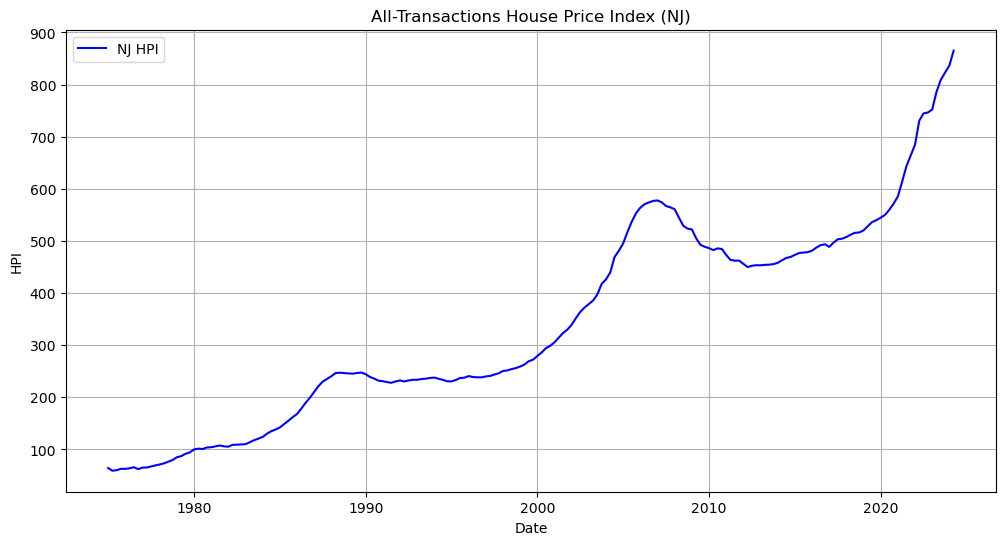

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df8 = pd.read_csv('../data/NJSTHPI.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df8.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df8.isnull().sum())

# Display the first and last few rows of the dataset
print("\nFirst Few Rows:")
print(df8.head())
print("\nLast Few Rows:")
print(df8.tail())

# Verify the date range in the dataset
print("\nDate Range:")
print(df8['DATE'].min(), df8['DATE'].max())

# Data Reprocessing: Convert DATE column to datetime format and set as index
if 'DATE' in df8.columns:
    df8['DATE'] = pd.to_datetime(df8['DATE'], errors='coerce')
    df8.set_index('DATE', inplace=True)
else:
    print("DATE column is missing in the dataset.")

# Verify the index
print("\nDataset Index After Setting DATE:")
print(df8.index)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df8.index, df8['NJSTHPI'], label='NJ HPI', color='blue')
plt.title('All-Transactions House Price Index (NJ)')
plt.xlabel('Date')
plt.ylabel('HPI')
plt.legend()
plt.grid()
plt.show()


## Normalized Core Inflation vs. Unemployment Rate (Monthly Data)

### Description
This dataset combines two critical economic indicators:
- **Core Inflation (CORESTICKM159SFRBATL)**: Tracks changes in core consumer prices over time, excluding volatile food and energy prices.
- **Unemployment Rate (UNRATE)**: Represents the percentage of the labor force currently unemployed but actively seeking work.

Normalizing both columns allows for a comparative analysis to identify trends and relationships between inflation and unemployment.

### Steps
1. Loaded the dataset and inspected its structure for inconsistencies.
2. Cleaned the data by:
   - Handling non-numeric entries in the core inflation column.
   - Filling missing values in the core inflation column via interpolation.
3. Normalized the core inflation and unemployment rate columns to make the trends comparable.
4. Visualized the normalized trends over time.

### Observations
- The graph provides a side-by-side comparison of core inflation and unemployment trends.
- Divergences or overlaps between the two may reflect significant economic events or policy impacts.

### Source
- [Core Inflation Data - FRED](https://fred.stlouisfed.org/)
- [Unemployment Rate Data - FRED](https://fred.stlouisfed.org/)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  922 non-null    object 
 1   CORESTICKM159SFRBATL  922 non-null    object 
 2   UNRATE                922 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.7+ KB
None

Null Values in Each Column:
DATE                    0
CORESTICKM159SFRBATL    0
UNRATE                  0
dtype: int64

Original Column Names:
Index(['DATE', 'CORESTICKM159SFRBATL', 'UNRATE'], dtype='object')

Cleaned Column Names:
Index(['DATE', 'CORESTICKM159SFRBATL', 'UNRATE'], dtype='object')

Dataset Information After DATE Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         

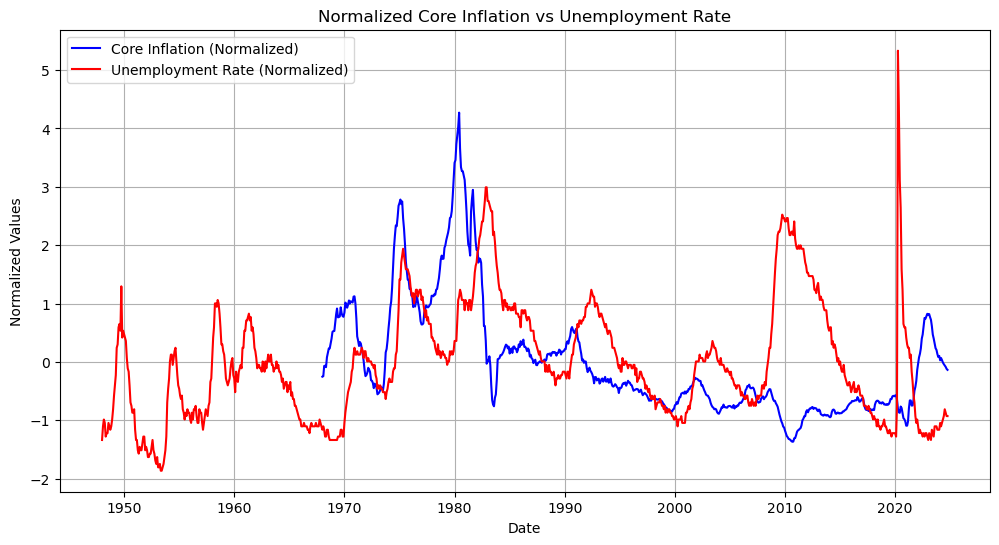

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df9 = pd.read_csv('../data/Monthly.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df9.info())

# Check for null values
print("\nNull Values in Each Column:")
print(df9.isnull().sum())

# Display column names before cleaning
print("\nOriginal Column Names:")
print(df9.columns)

# Remove leading/trailing spaces from column names
df9.columns = df9.columns.str.strip()
print("\nCleaned Column Names:")
print(df9.columns)

# Convert DATE column to datetime format
df9['DATE'] = pd.to_datetime(df9['DATE'], errors='coerce')
print("\nDataset Information After DATE Conversion:")
print(df9.info())

# Explore Core Inflation column
print("\nCore Inflation Summary Statistics Before Cleaning:")
print(df9['CORESTICKM159SFRBATL'].describe())

# Replace non-numeric entries with NaN and handle missing values
df9['CORESTICKM159SFRBATL'] = pd.to_numeric(df9['CORESTICKM159SFRBATL'], errors='coerce')
print("\nMissing Values in Core Inflation (Post-Cleaning):", df9['CORESTICKM159SFRBATL'].isna().sum())

# Interpolate missing values
df9['CORESTICKM159SFRBATL'] = df9['CORESTICKM159SFRBATL'].interpolate()

# Check summary statistics after cleaning
print("\nCore Inflation Summary Statistics After Cleaning:")
print(df9['CORESTICKM159SFRBATL'].describe())

# Normalize Core Inflation and Unemployment Rate
df9['CORESTICKM159SFRBATL_normalized'] = (
    df9['CORESTICKM159SFRBATL'] - df9['CORESTICKM159SFRBATL'].mean()
) / df9['CORESTICKM159SFRBATL'].std()
df9['UNRATE_normalized'] = (
    df9['UNRATE'] - df9['UNRATE'].mean()
) / df9['UNRATE'].std()

# Plot normalized Core Inflation vs. Unemployment Rate
plt.figure(figsize=(12, 6))
plt.plot(df9['DATE'], df9['CORESTICKM159SFRBATL_normalized'], label='Core Inflation (Normalized)', color='blue')
plt.plot(df9['DATE'], df9['UNRATE_normalized'], label='Unemployment Rate (Normalized)', color='red')
plt.title('Normalized Core Inflation vs Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid()
plt.show()


## Average Listing Price in New Jersey Over Time (AVELISPRINJ)

### Description
This dataset provides insights into the average listing price for properties in New Jersey over time. Tracking the average listing price helps analyze market trends, property value fluctuations, and demand dynamics across the state.

### Steps
1. Loaded the dataset and removed any leading/trailing spaces from column names for consistency.
2. Converted the `DATE` column to datetime format to enable time-series analysis.
3. Set the `DATE` column as the index to facilitate time-series plotting.
4. Visualized the average listing price trends over time.

### Observations
- The graph highlights long-term trends in listing prices across New Jersey.
- Steady increases may indicate rising demand, property value appreciation, or inflationary pressures in the housing market.

### Source
- [FRED - Federal Reserve Economic Data](https://fred.stlouisfed.org/series/AVELISPRINJ)


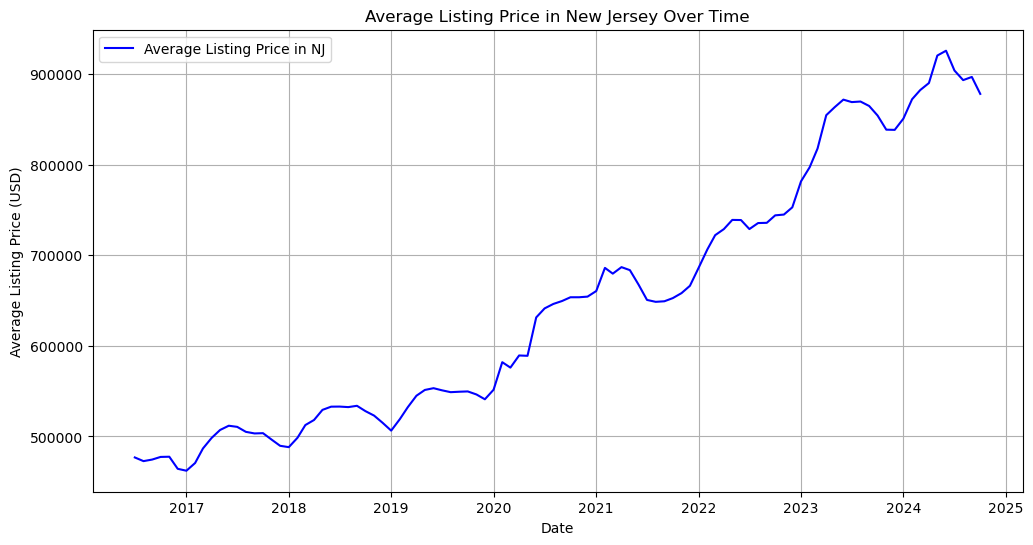

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df10 = pd.read_csv('../data/AVELISPRINJ.csv')

# Clean column names
df10.columns = df10.columns.str.strip()

# Convert DATE column to datetime format
df10['DATE'] = pd.to_datetime(df10['DATE'], errors='coerce')

# Set DATE as the index
df10.set_index('DATE', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df10.index, df10['AVELISPRINJ'], label='Average Listing Price in NJ', color='blue')
plt.title('Average Listing Price in New Jersey Over Time')
plt.xlabel('Date')
plt.ylabel('Average Listing Price (USD)')
plt.legend()
plt.grid()
plt.show()


## Housing Trends Over Time in New Jersey (Zillow Data)

### Description
This dataset, sourced from Zillow, provides various housing metrics for New Jersey over time. Key metrics include sales, prices, and inventory for single-family homes and condos. Analyzing these trends offers valuable insights into the real estate market's dynamics.

### Steps
1. Loaded the dataset and inspected for missing values.
2. Converted the `observation_date` column to datetime format for proper time-series handling.
3. Filled missing values using forward-fill to maintain continuity in the data.
4. Transformed the dataset into a long format for flexible analysis and visualization.
5. Plotted trends for specific housing metrics.

### Observations
- The graph illustrates trends in housing metrics for New Jersey.
- Peaks and troughs may indicate seasonal cycles, policy impacts, or shifts in market demand.

### Source
- [Zillow Housing Data](https://www.zillow.com/research/)


Missing Values in Each Column:
observation_date                 0
NJUCSFRCONDOSMSAMID_20220120    33
NJUCSFRCONDOSMSAMID_20220217    32
NJUCSFRCONDOSMSAMID_20220317    31
NJUCSFRCONDOSMSAMID_20220421    30
NJUCSFRCONDOSMSAMID_20220519    29
NJUCSFRCONDOSMSAMID_20220616    28
NJUCSFRCONDOSMSAMID_20220721    27
NJUCSFRCONDOSMSAMID_20220818    26
NJUCSFRCONDOSMSAMID_20220915    25
NJUCSFRCONDOSMSAMID_20221020    24
NJUCSFRCONDOSMSAMID_20221117    23
NJUCSFRCONDOSMSAMID_20221215    22
NJUCSFRCONDOSMSAMID_20230119    21
NJUCSFRCONDOSMSAMID_20230216    20
NJUCSFRCONDOSMSAMID_20230316    19
NJUCSFRCONDOSMSAMID_20230420    18
NJUCSFRCONDOSMSAMID_20230518    17
NJUCSFRCONDOSMSAMID_20230615    16
NJUCSFRCONDOSMSAMID_20230720    15
NJUCSFRCONDOSMSAMID_20230817    14
NJUCSFRCONDOSMSAMID_20230921    13
NJUCSFRCONDOSMSAMID_20231019    12
NJUCSFRCONDOSMSAMID_20231116    11
NJUCSFRCONDOSMSAMID_20231221    10
NJUCSFRCONDOSMSAMID_20240118     9
NJUCSFRCONDOSMSAMID_20240215     8
NJUCSFRCONDOSMSAMID_2024

/var/folders/z9/89tzx3fx6558r8hvpfsr2cg40000gn/T/ipykernel_26210/3396588305.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  zillow_data.fillna(method='ffill', inplace=True)


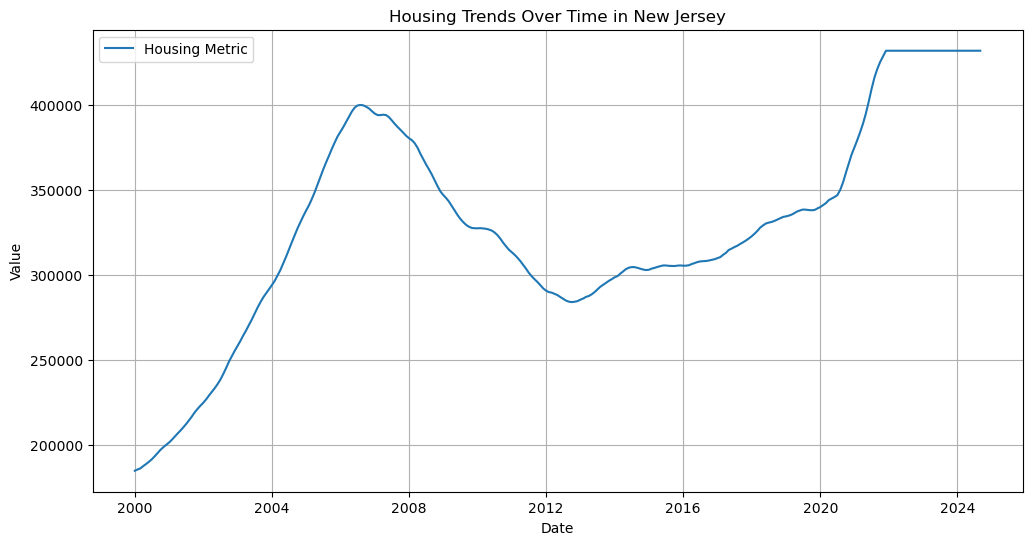

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Zillow dataset
zillow_data = pd.read_csv('../data/ZillowData.csv')

# Convert observation_date to datetime format
zillow_data['observation_date'] = pd.to_datetime(zillow_data['observation_date'])

# Check for missing values
print("Missing Values in Each Column:")
print(zillow_data.isnull().sum())

# Fill missing values using the forward-fill method
zillow_data.fillna(method='ffill', inplace=True)

# Transform dataset into long format for flexibility
zillow_long = zillow_data.melt(
    id_vars=['observation_date'], 
    var_name='metric', 
    value_name='value'
)
print("\nLong Format Dataset (First Few Rows):")
print(zillow_long.head())

# Plot a specific metric
plt.figure(figsize=(12, 6))
plt.plot(
    zillow_data['observation_date'], 
    zillow_data['NJUCSFRCONDOSMSAMID_20220120'], 
    label='Housing Metric'
)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Housing Trends Over Time in New Jersey')
plt.legend()
plt.grid()
plt.show()


## Merging Datasets on `DATE`

### Description
This section merges multiple datasets on the common `DATE` column using an outer join. The goal is to combine data from various sources into a single comprehensive dataset for analysis. The `DATE` column is standardized across all datasets to ensure consistency before merging.

### Steps
1. **Dataset Preparation**:
   - A list of datasets is defined.
   - For each dataset:
     - Ensure the `DATE` column exists and is in datetime format.
     - Reset the index if `DATE` is part of the index to avoid conflicts.
   - Handle any datasets that do not meet these requirements with appropriate checks.

2. **Merge Datasets**:
   - Use the `reduce` function to merge all datasets iteratively on the `DATE` column.
   - Apply an outer join to retain all rows, even if some datasets have missing values for certain dates.

3. **Save the Merged Dataset**:
   - Save the combined dataset to a CSV file for further use.


In [136]:
import pandas as pd
from functools import reduce

# Example datasets
datasets = [df, df2, df3, df4, df5, df6, df7, df8, df9, df10]  # Add more if needed

# Filter out any missing or undefined datasets
datasets = [data for data in datasets if 'DATE' in data.columns]

# Standardize DATE column in Dataset 10 if it exists
for dataset in datasets:
    if 'observation_date' in dataset.columns:
        dataset.rename(columns={'observation_date': 'DATE'}, inplace=True)
    if 'index' in dataset.columns:
        dataset.drop(columns=['index'], inplace=True, errors='ignore')

# Convert all DATE columns to datetime format
for dataset in datasets:
    dataset['DATE'] = pd.to_datetime(dataset['DATE'], errors='coerce')

# Merge all datasets on DATE using an outer join
if len(datasets) > 1:
    merged_data = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer'), datasets)
else:
    print("Not enough datasets to merge.")
    merged_data = None

# Display information about the merged dataset
if merged_data is not None:
    print("Merged Dataset Info:")
    print(merged_data.info())
    merged_data.to_csv('../data/merged_real_estate_data.csv', index=False)
    print("Merged dataset saved to merged_real_estate_data.csv")


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATE                             922 non-null    datetime64[ns]
 1   MEDDAYONMARNJ                    100 non-null    float64       
 2   MEDLISPRIMM34017                 88 non-null     float64       
 3   MEDLISPRIPERSQUFEENJ             100 non-null    float64       
 4   MEDLISPRIPERSQUFEEMM34025        88 non-null     float64       
 5   MEDLISPRIMM34009                 88 non-null     float64       
 6   MEDLISPRI34023                   100 non-null    float64       
 7   MEDLISPRI34003                   100 non-null    float64       
 8   NJSTHPI                          198 non-null    float64       
 9   CORESTICKM159SFRBATL             682 non-null    float64       
 10  UNRATE                           922 non-

## Merging Datasets on `DATE`

### Purpose
The goal of this step is to merge multiple datasets into a single cohesive dataset by aligning them on the common `DATE` column. This unified dataset will facilitate subsequent analysis and modeling.

### Approach
1. **Dataset Standardization**:
   - Ensure each dataset has a `DATE` column in the correct datetime format.
   - If the `DATE` column is part of the index, reset it to avoid conflicts.

2. **Merge Process**:
   - Use an outer join to retain all rows across the datasets, even if certain datasets lack entries for specific dates.
   - Employ the `reduce` function to iteratively merge the datasets on the `DATE` column.

3. **Save Results**:
   - Export the merged dataset to a CSV file for easy access in subsequent stages of the project.

In [118]:
import pandas as pd
from functools import reduce

# List of datasets
datasets = [df, df2, df3, df4, df5, df6, df7, df8, df9]

# Ensure DATE is a column in all datasets and remove any index conflicts
for idx, dataset in enumerate(datasets):
    if isinstance(dataset, pd.DataFrame):
        # Reset index if DATE is already an index
        if 'DATE' not in dataset.columns and dataset.index.name == 'DATE':
            dataset.reset_index(inplace=True)
        # Ensure DATE column exists
        if 'DATE' in dataset.columns:
            dataset['DATE'] = pd.to_datetime(dataset['DATE'], errors='coerce')
    else:
        print(f"Dataset {idx} is not a valid DataFrame.")

# Merge datasets on DATE using an outer join
merged_data = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer'), datasets)

# Display merged dataset information
print("Merged Dataset Info:")
print(merged_data.info())
print(merged_data.head())

# Save the merged dataset for further use
merged_data.to_csv("merged_data.csv", index=False)


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATE                             922 non-null    datetime64[ns]
 1   MEDDAYONMARNJ                    100 non-null    float64       
 2   MEDLISPRIMM34017                 88 non-null     float64       
 3   MEDLISPRIPERSQUFEENJ             100 non-null    float64       
 4   MEDLISPRIPERSQUFEEMM34025        88 non-null     float64       
 5   MEDLISPRIMM34009                 88 non-null     float64       
 6   MEDLISPRI34023                   100 non-null    float64       
 7   MEDLISPRI34003                   100 non-null    float64       
 8   NJSTHPI                          198 non-null    float64       
 9   CORESTICKM159SFRBATL             682 non-null    float64       
 10  UNRATE                           922 non-

#Model Evaluation

Percentage of Missing Values per Column:
DATE                                0.000000
MEDDAYONMARNJ                      89.154013
MEDLISPRIMM34017                   90.455531
MEDLISPRIPERSQUFEENJ               89.154013
MEDLISPRIPERSQUFEEMM34025          90.455531
MEDLISPRIMM34009                   90.455531
MEDLISPRI34023                     89.154013
MEDLISPRI34003                     89.154013
NJSTHPI                            78.524946
CORESTICKM159SFRBATL               26.030369
UNRATE                              0.000000
CORESTICKM159SFRBATL_normalized    26.030369
UNRATE_normalized                   0.000000
dtype: float64
Missing Values After Interpolation:
DATE                                0
MEDDAYONMARNJ                       0
MEDLISPRIMM34017                   12
MEDLISPRIPERSQUFEENJ                0
MEDLISPRIPERSQUFEEMM34025          12
MEDLISPRIMM34009                   12
MEDLISPRI34023                      0
MEDLISPRI34003                      0
NJSTHPI            

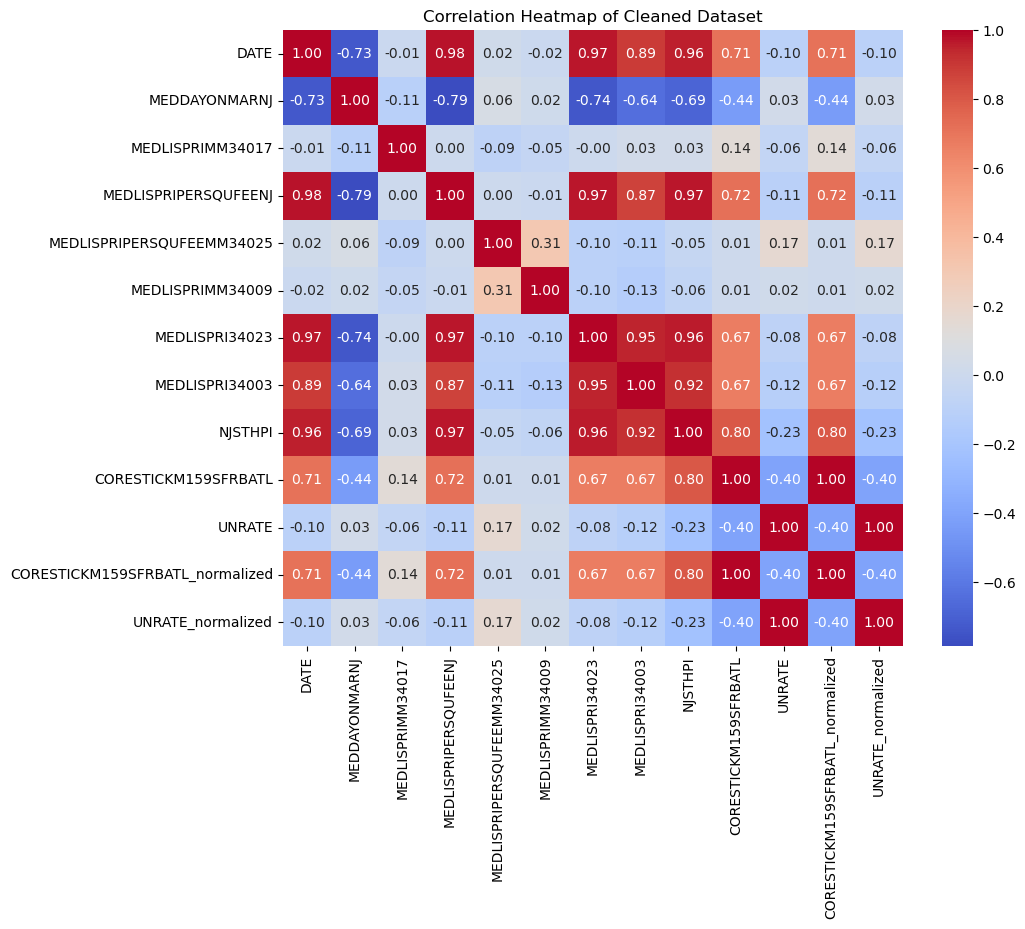

Model R^2 Score: 0.9791964811501792


In [138]:
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Handle Missing Data
print("Percentage of Missing Values per Column:")
print(merged_data.isnull().mean() * 100)

# Interpolate missing values and drop rows where the target is NaN
cleaned_data = merged_data.interpolate(method='linear').dropna(subset=['MEDLISPRI34023'])
print("Missing Values After Interpolation:")
print(cleaned_data.isnull().sum())

# Step 2: Save Cleaned Data
cleaned_data.to_csv("cleaned_merged_data.csv", index=False)

# Step 3: Heatmap of Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cleaned Dataset")
plt.show()

# Step 4: Prepare Data for Modeling
X = cleaned_data.drop(columns=['DATE', 'MEDLISPRI34023'])
y = cleaned_data['MEDLISPRI34023']

# Handle missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with column mean
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(f"Model R^2 Score: {model.score(X_test, y_test)}")
